# Discussion 1: Database basics and Linear Regression

In this example, we will be using [the Wine Dataset from UCI](https://archive.ics.uci.edu/ml/datasets/wine). <br >
The data is the results of a chemical analysis of wines grown in the same region in Italy. <br >
There are 13 different measurements taken from 3 types of wines(cultivators/grapevines).

Then, we will proceed to build Linear and Polynomial Regression models to show relations more closely.

In [3]:
#imports needed

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from IPython.display import display

### Printing the head of the dataset:

Here we display the first 5 elements of the dataset, also called the 'head'.

This is a common way to display what a pandas dataframe looks like.

In [4]:
from sklearn.datasets import load_wine
df, _ = load_wine(return_X_y=True, as_frame=True) 
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Below is also a common way of loading a pandas DataFrame using a local file.

In [5]:
df_ = pd.read_csv('./American_Housing_Data.csv')
df_ = df_[:10000]
df_.head()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income
0,10013,3999000.0,2,3,1967,29563,20967.9,370046.0
1,10013,3999000.0,2,3,1967,29563,20967.9,370046.0
2,10014,1650000.0,1,1,718,29815,23740.9,249880.0
3,10014,760000.0,3,2,1538,29815,23740.9,249880.0
4,10014,1100000.0,1,1,600,29815,23740.9,249880.0


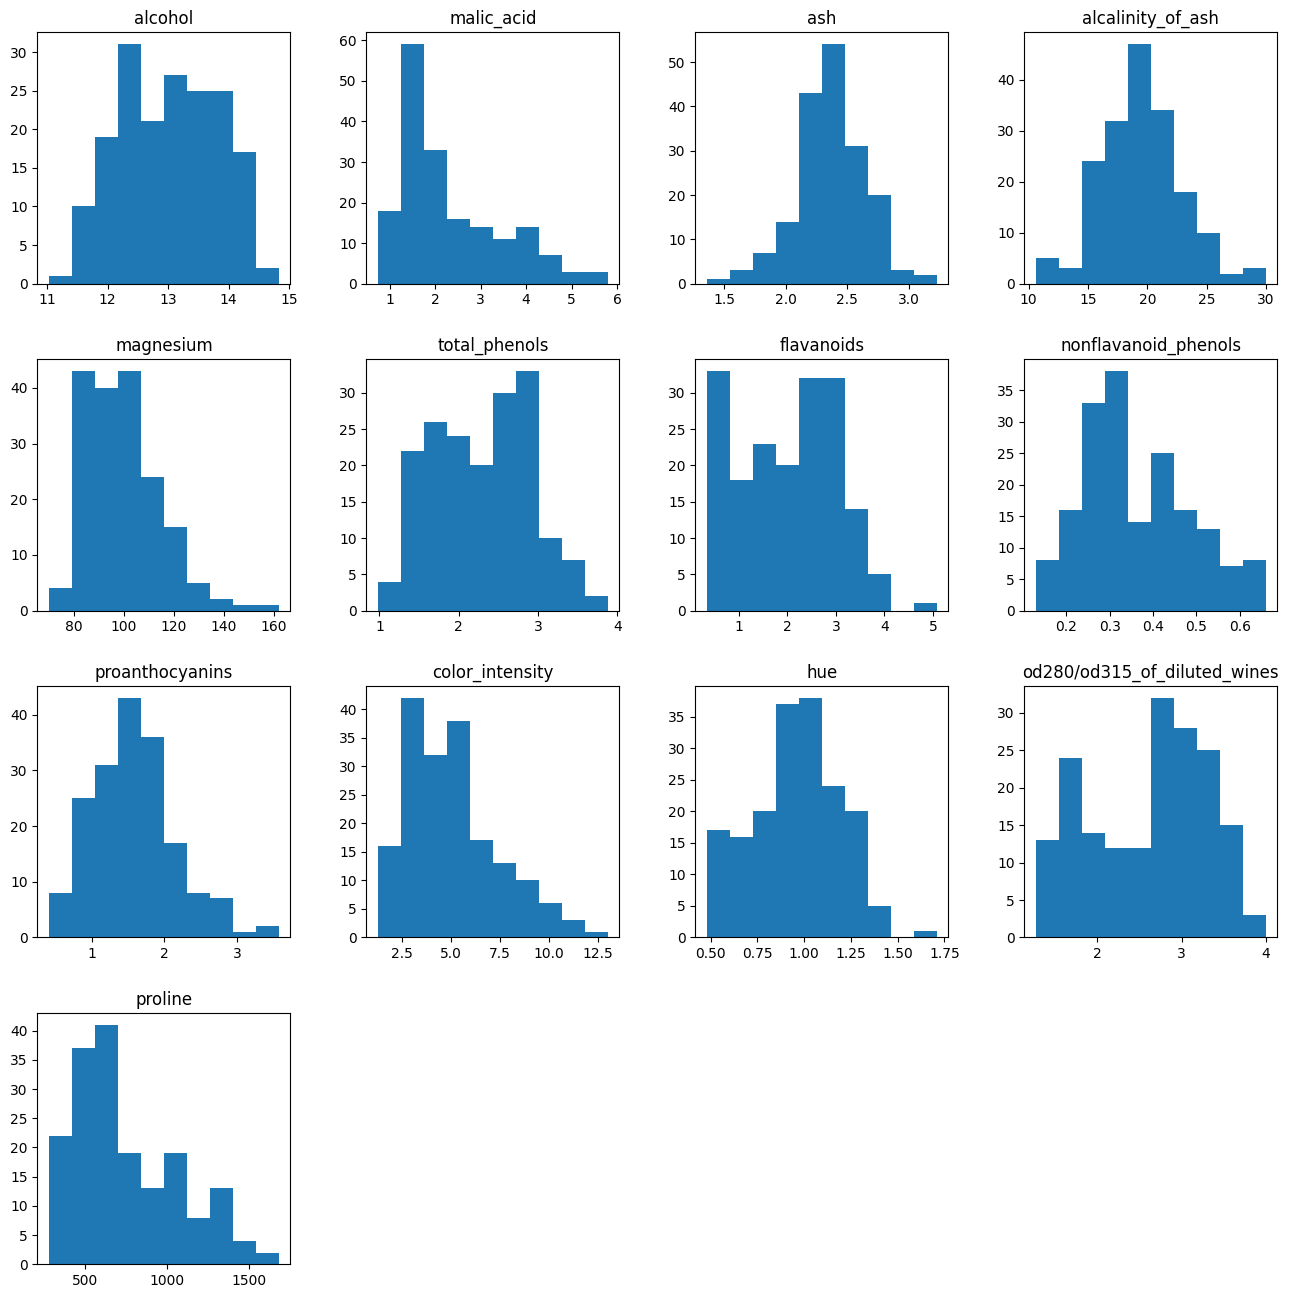

In [6]:
# This underscore skips printing the object information of our plot.
_ = df.hist(figsize=(16,16), grid=False)

## Correlation Matrix

When we are trying to use Linear Regression on a dataset to predict a certain variable's values, we have to be wise when we choose the independent variable for our Linear Regression

Ideally we want to choose variables that show some resemblance of a Linear Relationship with the variable in question. 

If we want to use the Wine Dataset to be able to predict the alcohol percentage in the drink, then we can use the Pearson correlation coefficient (default in pandas) to find the comparative metric.

Also, we can then use frameworks like Seaborn or Matplotlib to create a heatmap, hotter squares signifying a positive linear relationship, while colder squares showing a not so dependant relationship

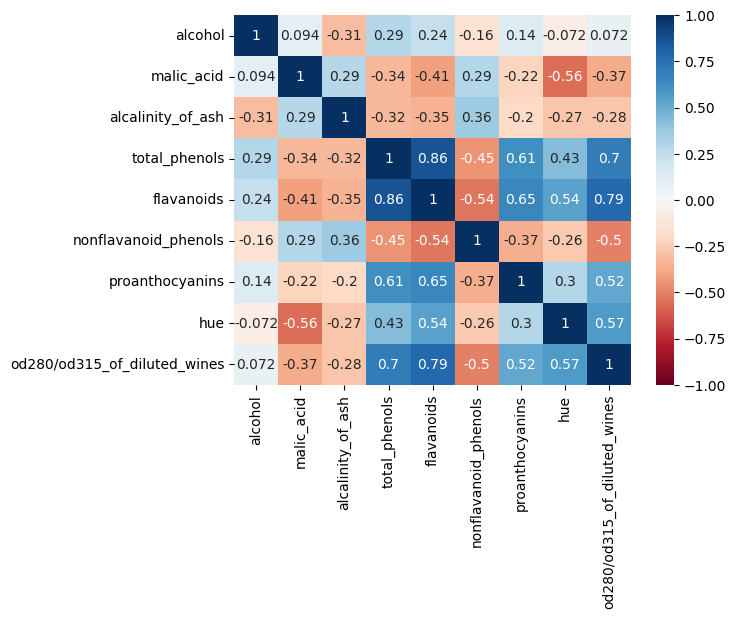

In [7]:
data = df.copy().drop(columns=['ash', 'magnesium', 'color_intensity', 'proline']).corr()
_ = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

From the above data, we can see that alcalinity of ash, nonflavonoid_phenols and hue are the only factors that show any information gain with respect to the alcohol content. 

All the other variables do not give enough information.

## Pariwise Plots:

A very strong way of figuring out 1-1 relationships between variables in a dataset is to create pariwise plots in order to study them separately.

Although making plots one by one can be very time consuming, many frameworks have streamlined this process and can create informative plots quickly.

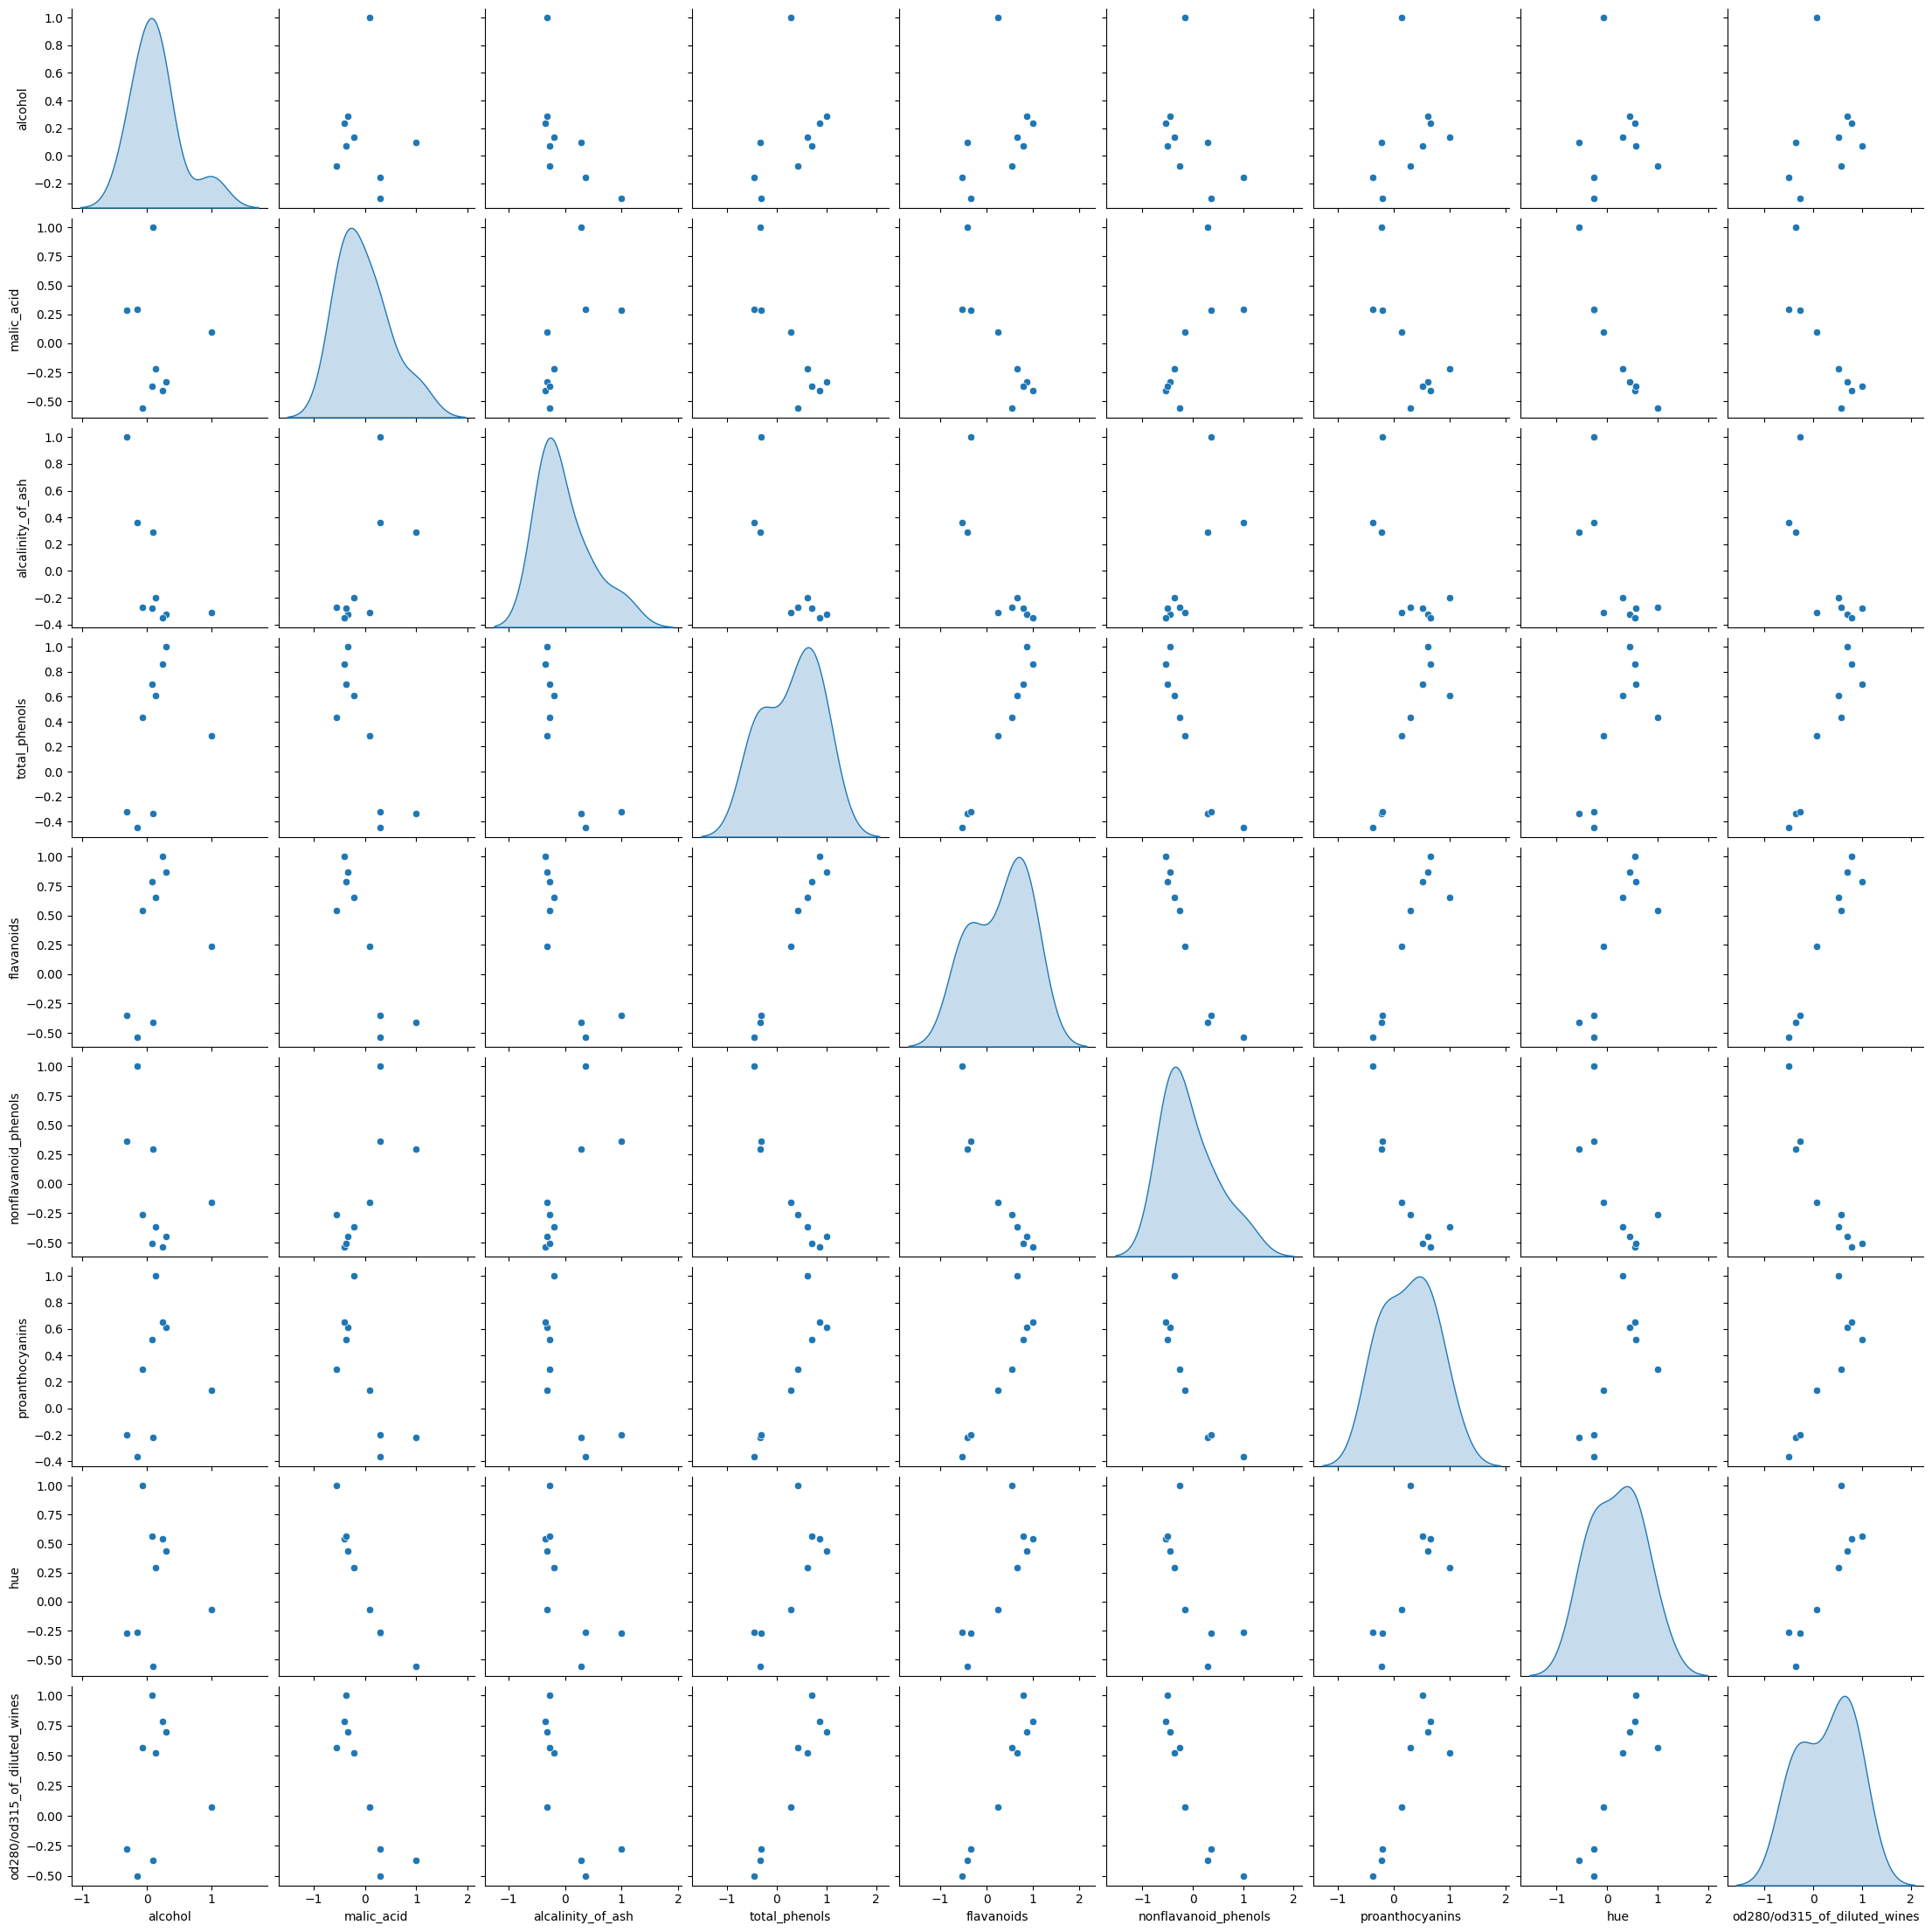

In [22]:
# Seaborn solution
_ = sns.pairplot(data, diag_kind='kde')

## Linear Regression

Typically when doing linear regression, we want to leave out a small percentage of the data for testing. We call this splitting the dataset. 

For our intent, we will split the dataset in 75-25% fashion. Typically in larger datasets, the testing percent can be much smaller compared to the training. 

In [24]:
train, test = train_test_split(df, test_size=0.25, random_state=21)
X_train, y_train = train.drop(columns=['alcohol']), train['alcohol']
X_test, y_test = test.drop(columns=['alcohol']), test['alcohol']

In [25]:
print(f'Training data shape: {X_train.shape} \nTesting Data shape: {X_test.shape}')

Training data shape: (133, 12) 
Testing Data shape: (45, 12)


The train_test_split function does the splitting for us appropriately, dividing the data randomly in the appropriate shape.

Going forward for the linear regression, let us say we choose the variable 'alcalinity_of_ash'. If we  do so, we have to use only that column for our training and testing datasets in order to train exclusively on that variable

In [26]:
choice = 'alcalinity_of_ash'
X_train, X_test = X_train[choice], X_test[choice]

Now, we can develop a linear regression model for the choice made above. From there we can see how good of a prediction we can make for the alcohol content in the wine.

In [27]:
# Create a LinearRegression model
lr = LinearRegression()

# Note that, .reshape() is only applied when we are working with one column data.
# It is to convert a vector to a matrix essentially. 
# Also, lr.fit() is the function that does the training on the dataset.
lr.fit(np.asarray(X_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1))

# Now using the trained model, we can make predictions on the test data that we had kept aside, 
# to see how good our model does.
predicted = lr.predict(np.asarray(X_test).reshape(-1, 1))

# Now, we compare our predictions with the true values in order to find the error generated by our model
print(f'Testing MSE error is: {round(mean_squared_error(predicted, np.asarray(y_test).reshape(-1, 1)), 4)}')

Testing MSE error is: 0.5145


As we can see that the MSE error is very low, making either the model a good predictor for the alcohol content that we are trying to predict, or just a very shallow model where the error is low simply because of the small number of datapoints we used.

## Polynomial Regression

Similar to linear regression, we can also implement different degrees for the same variable, or use multiple variables multiplied together in order to protray more complex relationships effectively. 

Polynomial Regression builds a model in a very similar way to Linear Regression, but we just have to build a poly model in order to feed data to the LR model.

In [30]:
# Below function contructs the poly features from the choice we had made earlier. 
# We are just assuming degree = 2, for simplicity.
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(np.asarray(X_train).reshape(-1, 1))
plr = LinearRegression()
# Note that I didn't do reshape on X_poly as it's already a matrix.
plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))

predicted = plr.predict(poly.transform(np.asarray(X_test).reshape(-1, 1)))

coef = pd.DataFrame(plr.coef_, columns=[f'b{i+1}' for i in range(2)])
coef.insert(loc=0, column='b0', value=plr.intercept_)
coef = coef.style.format("{:10,.10f}")
display(coef)

print(f'Polynomial regression with degree = {2}')
print(f'Training MSE error is: {round(mean_squared_error(plr.predict(X_poly), y_train),4)}')
print(f'Testing MSE error is: {round(mean_squared_error(predicted, y_test),4)}')
print('\n')

,b0,b1,b2
0,15.5006992742,-0.1917342881,0.0031567301


Polynomial regression with degree = 2
Training MSE error is: 0.6169
Testing MSE error is: 0.4927


